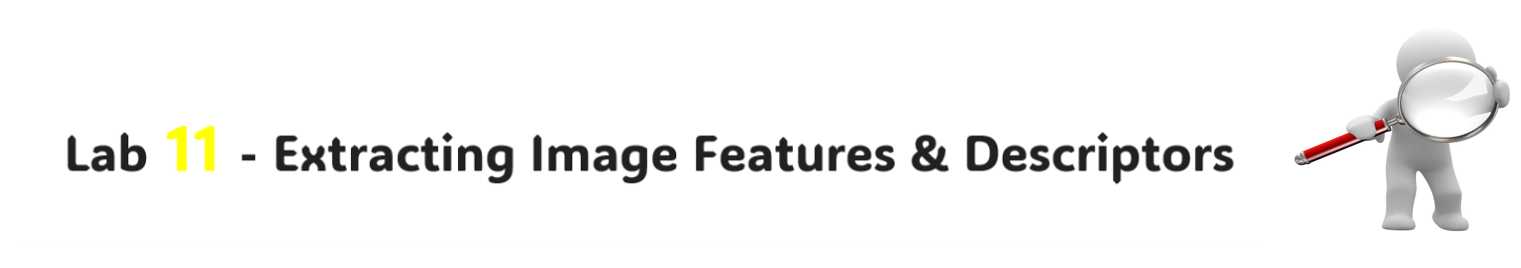

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import feature, filters, io

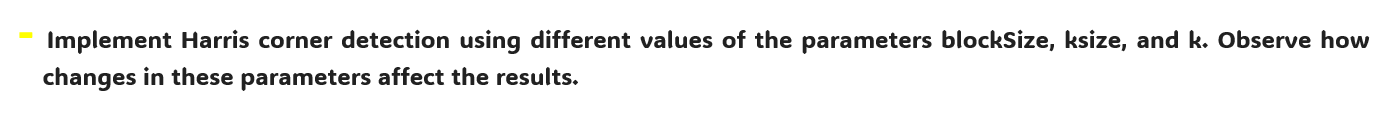

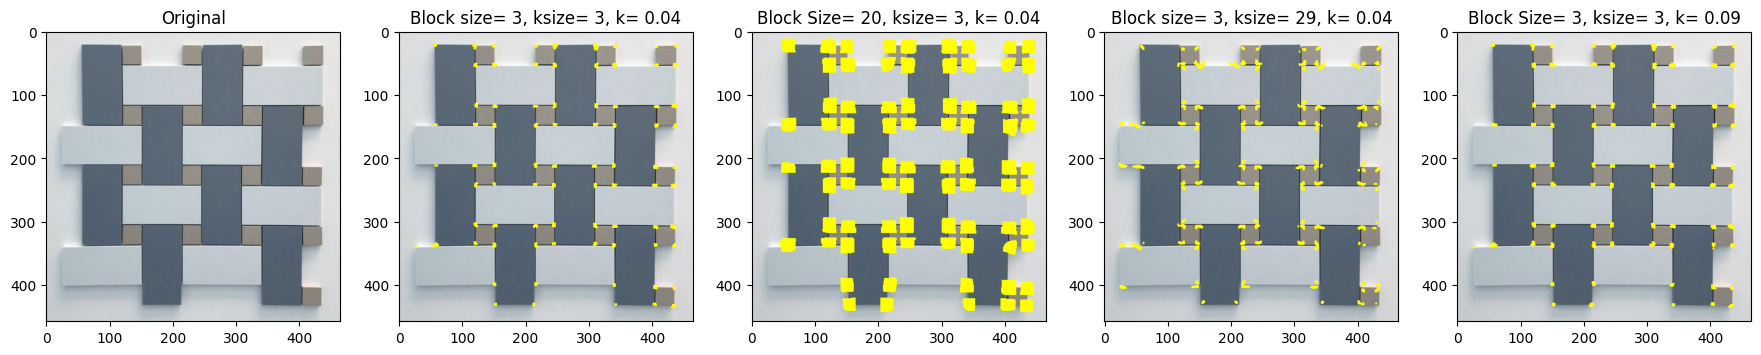

In [ ]:
img_original = io.imread('/content/pic3.jpg')

def harris_corner_detector(image, block_size, ksize, k):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    dst = cv2.dilate(dst, None)
    image[dst > 0.001 * dst.max()] = [0, 255, 255]
    return image

corner_image_original = harris_corner_detector(img_original.copy(), 3, 3, 0.04)
corner_image_blocksize = harris_corner_detector(img_original.copy(), 20, 3, 0.04)
corner_image_ksize = harris_corner_detector(img_original.copy(), 3, 29, 0.04)
corner_image_k = harris_corner_detector(img_original.copy(), 3, 3, 0.01)

plt.figure(figsize=(22, 5))
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(1, 5, 2)
plt.imshow(cv2.cvtColor(corner_image_original, cv2.COLOR_BGR2RGB))
plt.title("Block size= 3, ksize= 3, k= 0.04")
plt.subplot(1, 5, 3)
plt.imshow(cv2.cvtColor(corner_image_blocksize, cv2.COLOR_BGR2RGB))
plt.title("Block Size= 20, ksize= 3, k= 0.04")
plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(corner_image_ksize, cv2.COLOR_BGR2RGB))
plt.title("Block size= 3, ksize= 29, k= 0.04")
plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(corner_image_k, cv2.COLOR_BGR2RGB))
plt.title("Block Size= 3, ksize= 3, k= 0.09")

plt.show()

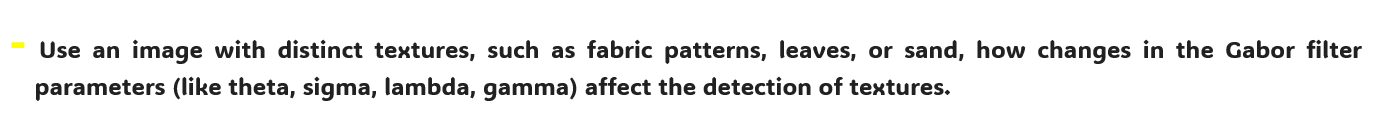



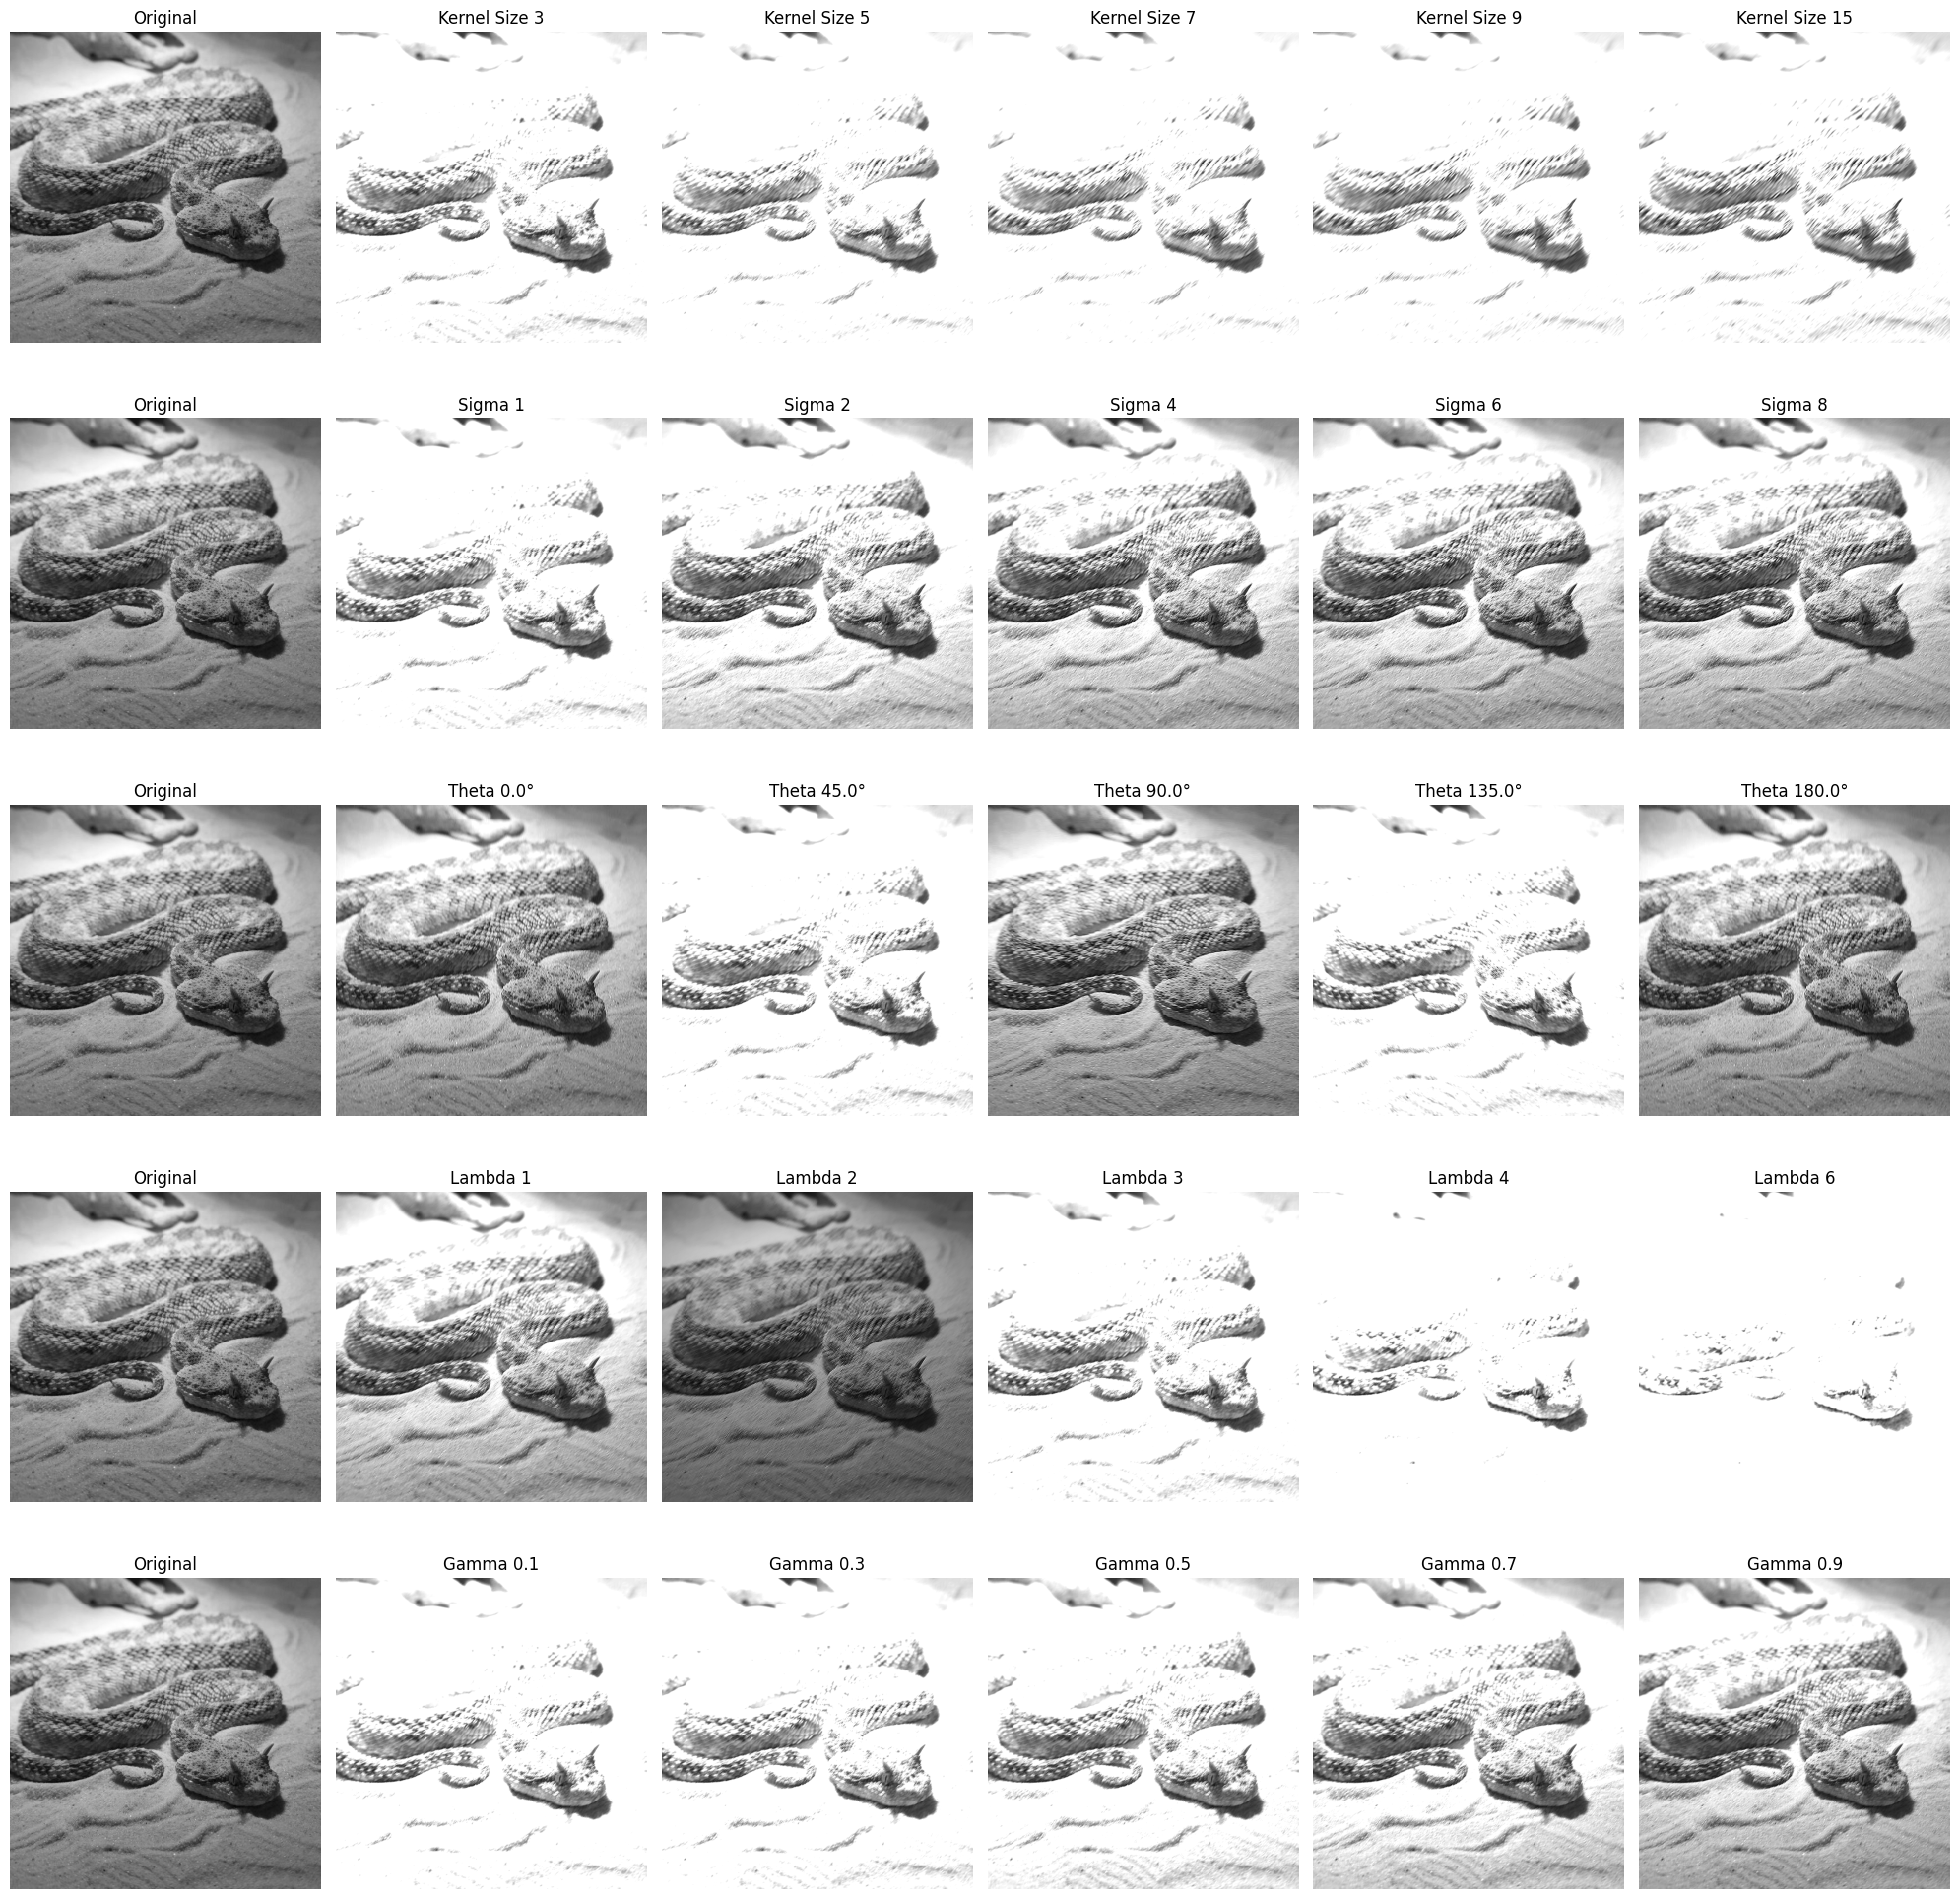

In [ ]:
image = cv2.imread('/content/pic4.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def apply_gabor_filter(gray, kernel_size, sigma, theta, lambd, gamma, psi=0):
    gabor_kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    filtered_image = cv2.filter2D(gray, -1, gabor_kernel)
    return filtered_image

kernel_sizes = [3, 5, 7, 9, 15]
sigmas = [1, 2, 4, 6, 8]  #more -> more stripes
thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
lambdas = [1, 2, 3, 4, 6] #width
gammas = [0.1, 0.3, 0.5, 0.7, 0.9] #height

plt.figure(figsize=(20, 20))

for row in range(5):
    plt.subplot(5, 6, row * 6 + 1)
    plt.imshow(gray, cmap='gray')
    plt.title('Original')
    plt.axis('off')

# kernel_sizes = [3, 5, 7, 9, 15]
for i, ks in enumerate(kernel_sizes):
    gabor_result = apply_gabor_filter(gray, ks, 1, np.pi/4, 3, 0.3)
    plt.subplot(5, 6, i + 2)
    plt.imshow(gabor_result, cmap='gray')
    plt.title(f'Kernel Size {ks}')
    plt.axis('off')

# sigmas = [1, 2, 4, 6, 8]
for i, sigma in enumerate(sigmas):
    gabor_result = apply_gabor_filter(gray, 3, sigma, np.pi/4, 3, 0.3)
    plt.subplot(5, 6, i + 8)
    plt.imshow(gabor_result, cmap='gray')
    plt.title(f'Sigma {sigma}')
    plt.axis('off')

# thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
for i, theta in enumerate(thetas):
    gabor_result = apply_gabor_filter(gray, 3, 1, theta, 3, 0.3)
    plt.subplot(5, 6, i + 14)
    plt.imshow(gabor_result, cmap='gray')
    plt.title(f'Theta {np.degrees(theta)}°')
    plt.axis('off')

# lambdas = [1, 2, 3, 4, 6]
for i, lambd in enumerate(lambdas):
    gabor_result = apply_gabor_filter(gray, 3, 1, np.pi/4, lambd, 0.3)
    plt.subplot(5, 6, i + 20)
    plt.imshow(gabor_result, cmap='gray')
    plt.title(f'Lambda {lambd}')
    plt.axis('off')

# gammas = [0.1, 0.3, 0.5, 0.7, 0.9]
for i, gamma in enumerate(gammas):
    gabor_result = apply_gabor_filter(gray, 3, 1, np.pi/4, 3, gamma)
    plt.subplot(5, 6, i + 26)
    plt.imshow(gabor_result, cmap='gray')
    plt.title(f'Gamma {gamma}')
    plt.axis('off')

plt.tight_layout()
plt.show()

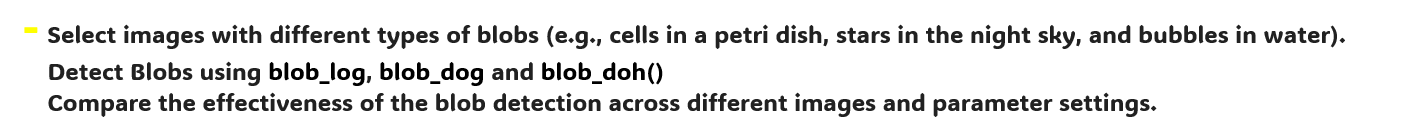

In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

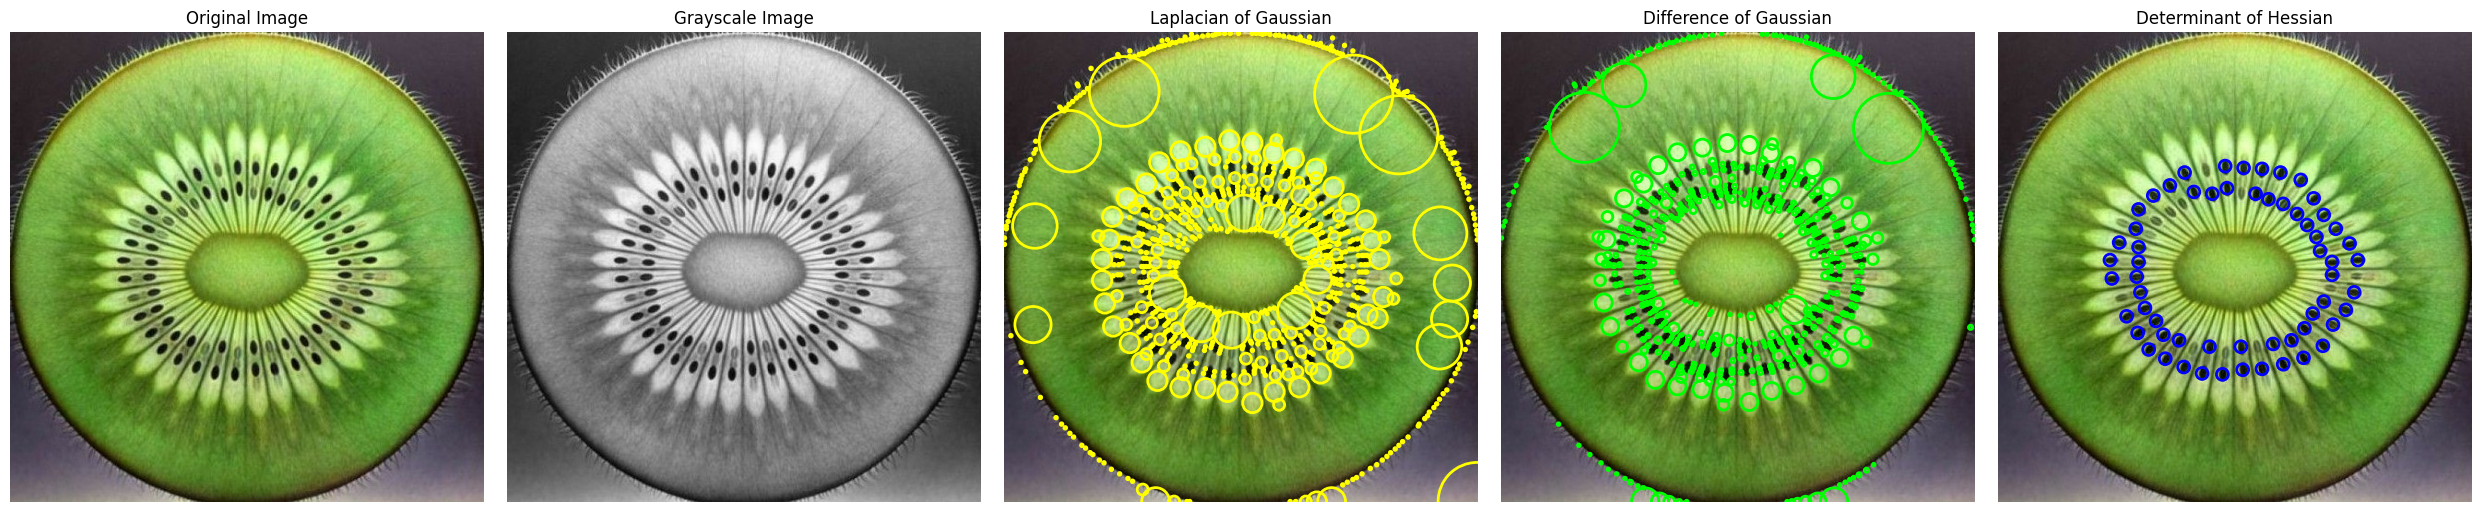

In [ ]:
image = io.imread('/content/pic5.jpg')
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, threshold=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=50, threshold=0.01)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_gray, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

axes[2].imshow(image)
axes[2].set_title('Laplacian of Gaussian')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
    axes[2].add_patch(c)
axes[2].axis('off')

axes[3].imshow(image)
axes[3].set_title('Difference of Gaussian')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='lime', linewidth=2, fill=False)
    axes[3].add_patch(c)
axes[3].axis('off')

axes[4].imshow(image)
axes[4].set_title('Determinant of Hessian')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='blue', linewidth=2, fill=False)
    axes[4].add_patch(c)
axes[4].axis('off')

plt.tight_layout()
plt.show()

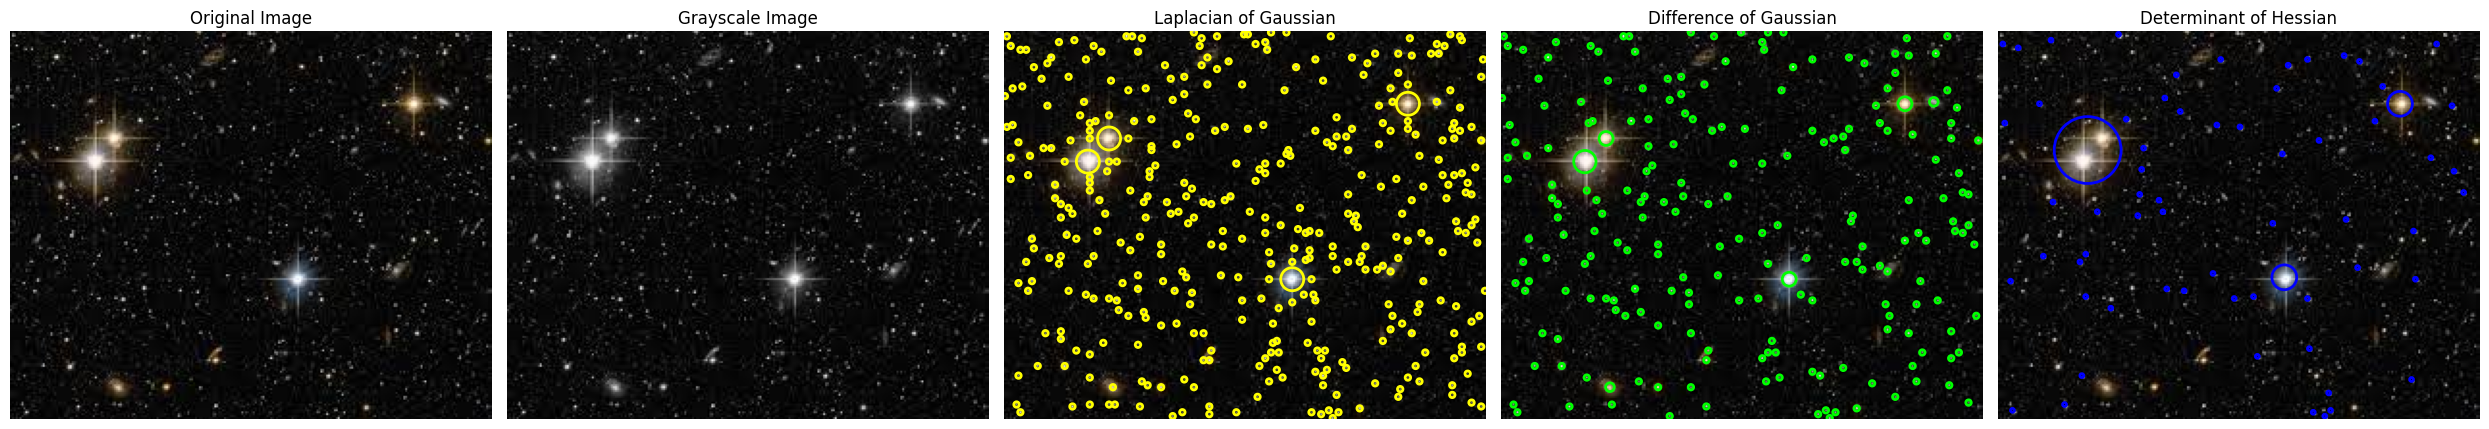

In [ ]:
image = io.imread('/content/pic6.jpeg')
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, threshold=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=50, threshold=0.01)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_gray, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

axes[2].imshow(image)
axes[2].set_title('Laplacian of Gaussian')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
    axes[2].add_patch(c)
axes[2].axis('off')

axes[3].imshow(image)
axes[3].set_title('Difference of Gaussian')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='lime', linewidth=2, fill=False)
    axes[3].add_patch(c)
axes[3].axis('off')

axes[4].imshow(image)
axes[4].set_title('Determinant of Hessian')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='blue', linewidth=2, fill=False)
    axes[4].add_patch(c)
axes[4].axis('off')

plt.tight_layout()
plt.show()

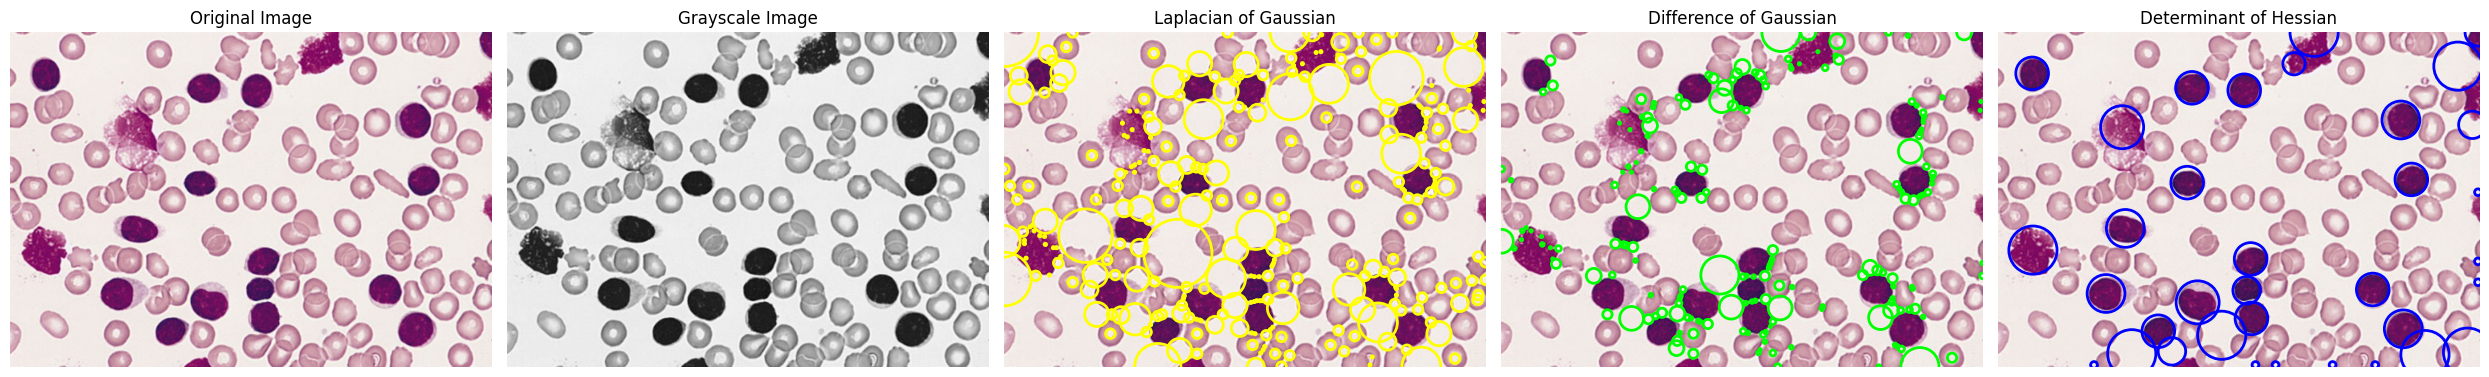

In [ ]:
image = io.imread('/content/pic7.jpg')
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, threshold=0.15)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)                     # this scaling makes the radius more representative of the size of the blob detected.

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=0.15)  # allows detection of larger blobs, which means it will detect blobs that scale up to 30.
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)                     # a higher threshold means fewer blobs are detected, focusing only on the most features.

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=0.01)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_gray, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

axes[2].imshow(image)
axes[2].set_title('Laplacian of Gaussian')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
    axes[2].add_patch(c)
axes[2].axis('off')

axes[3].imshow(image)
axes[3].set_title('Difference of Gaussian')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='lime', linewidth=2, fill=False)
    axes[3].add_patch(c)
axes[3].axis('off')

axes[4].imshow(image)
axes[4].set_title('Determinant of Hessian')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='blue', linewidth=2, fill=False)
    axes[4].add_patch(c)
axes[4].axis('off')

plt.tight_layout()
plt.show()